### ( 1 ) 데이터 가져오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./bike_regression/data/bike-sharing-demand/train.csv')

### ( 2 ) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [3]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
pd.to_datetime(train_data['datetime'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [5]:
train_data['year'] = pd.DatetimeIndex(train_data['datetime']).year
train_data['month'] = pd.DatetimeIndex(train_data['datetime']).month
train_data['day'] = pd.DatetimeIndex(train_data['datetime']).day
train_data['hour'] = pd.DatetimeIndex(train_data['datetime']).hour
train_data['minute'] = pd.DatetimeIndex(train_data['datetime']).minute
train_data['second'] = pd.DatetimeIndex(train_data['datetime']).second

In [6]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [7]:
train_data.drop('datetime', axis=1, inplace=True)

In [8]:
train_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


### ( 3 ) year, month, day, hour, minute, second 데이터 개수 시각화하기

In [9]:
import seaborn as sns

In [10]:
list(train_data['year'].value_counts().index)

[2012, 2011]

<AxesSubplot:xlabel='year', ylabel='count'>

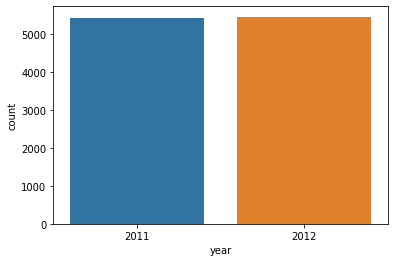

In [11]:
sns.countplot(x=train_data['year'])

<AxesSubplot:xlabel='month', ylabel='count'>

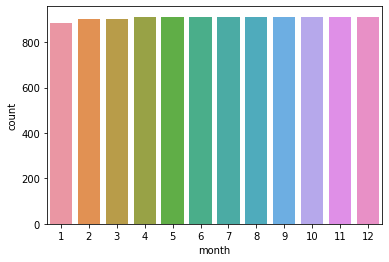

In [12]:
sns.countplot(x=train_data['month'])

<AxesSubplot:xlabel='day', ylabel='count'>

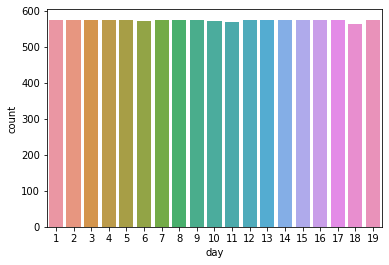

In [13]:
sns.countplot(x=train_data['day'])

<AxesSubplot:xlabel='hour', ylabel='count'>

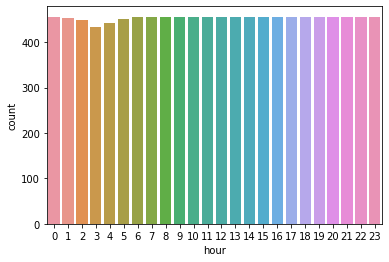

In [14]:
sns.countplot(x=train_data['hour'])

<AxesSubplot:xlabel='minute', ylabel='count'>

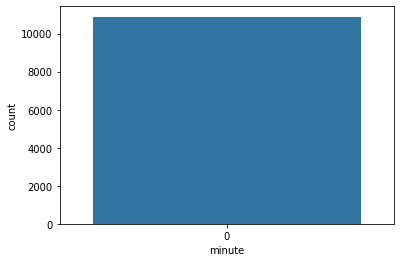

In [15]:
sns.countplot(x=train_data['minute'])

<AxesSubplot:xlabel='second', ylabel='count'>

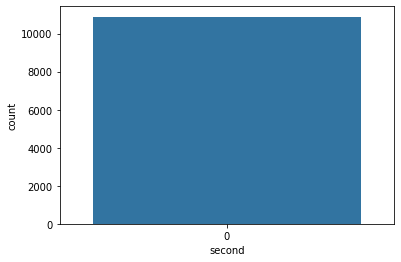

In [16]:
sns.countplot(x=train_data['second'])

### ( 4 ) X, y 컬럼 선택 및 train/test 데이터 분리

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [19]:
len(list(train_data.columns))

17

/tmp/ipykernel_459/165246645.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(6, 3, str(idx+1))


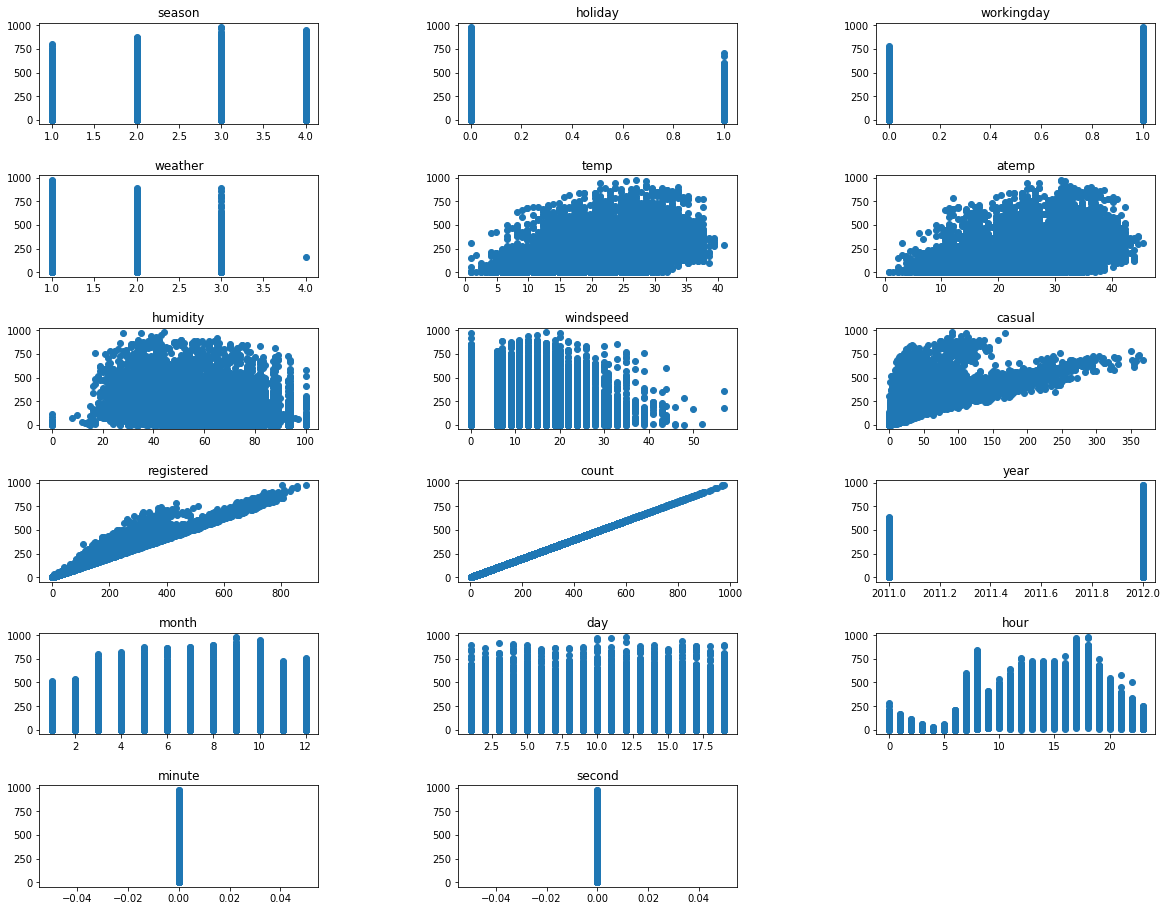

In [20]:
fig = plt.figure(figsize = (20, 15))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
for idx, i in enumerate(list(train_data.columns)):
    ax = fig.add_subplot(6, 3, str(idx+1))
    ax.scatter(train_data[i], train_data['count'])
    plt.title(str(i))

####  minute, second, registered, causal, year은 model prediction에 크게 도움되지 않는다.

In [21]:
train_data_2 = train_data.copy()

In [22]:
train_data.drop(['minute','second','registered', 'casual', 'year'], axis=1, inplace = True)

In [23]:
train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4


In [24]:
X_train, X_test, y_train, y_test = train_test_split(train_data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity','windspeed','month','day','hour']], train_data[['count']], test_size=0.2, random_state=32)

### ( 5 ) LinearRegression 모델 학습

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

### ( 6 ) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [29]:
from sklearn.metrics import mean_squared_error

#### MSE

In [30]:
mean_squared_error(y_pred, y_test)

21629.202980138594

#### RMSE

In [31]:
np.sqrt(mean_squared_error(y_pred, y_test))

147.06870156542007

### ( 7 ) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

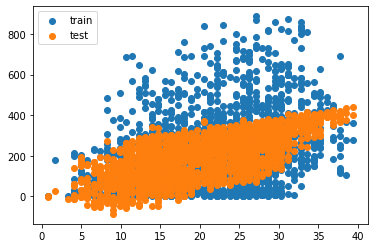

In [32]:
plt.scatter(X_test['temp'], y_test, label='train')
plt.scatter(X_test['temp'], y_pred, label='test')
plt.legend()

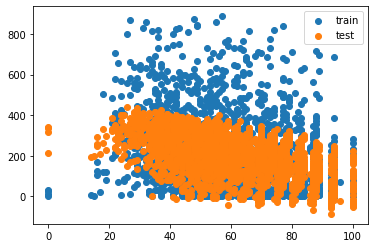

In [33]:
plt.scatter(X_test['humidity'], y_test, label='train')
plt.scatter(X_test['humidity'], y_pred, label='test')
plt.legend()

In [34]:
a = list(train_data.columns)

In [35]:
a.remove('count')

<BarContainer object of 11 artists>

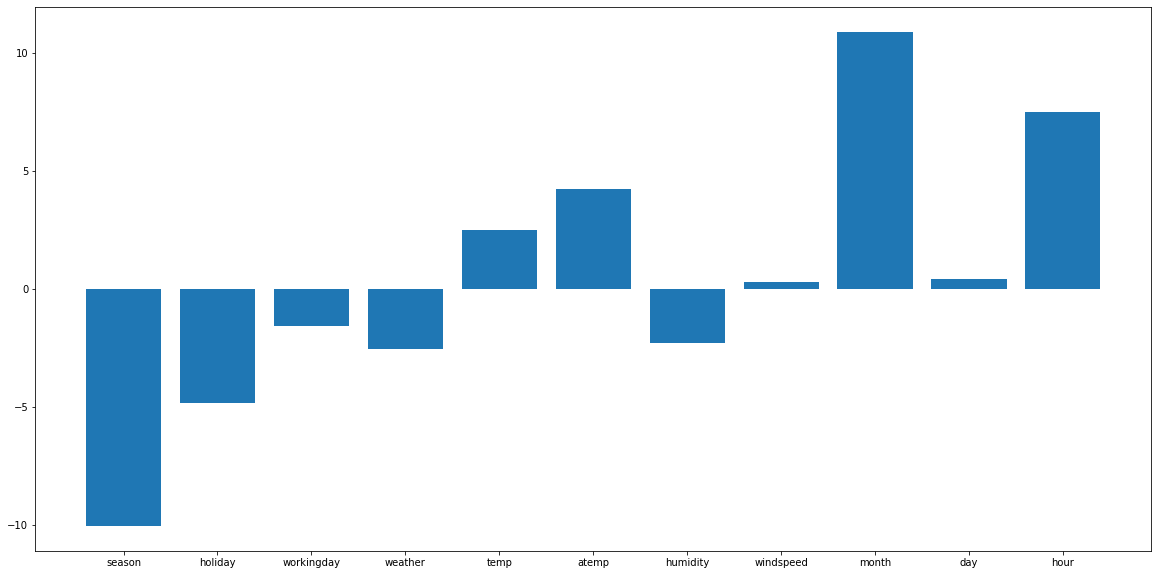

In [36]:
plt.figure(figsize=(20,10))
plt.bar(a, lr.coef_.reshape(-1))

#### Test

In [37]:
train_data_2.drop(['minute','second'], axis=1, inplace = True)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train_data_2[['season', 'casual','holiday','registered', 'workingday', 'weather', 'temp', 'atemp', 'humidity','windspeed', 'year','month','day','hour']], train_data[['count']], test_size=0.2, random_state=32)

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)

In [42]:
mean_squared_error(y_pred, y_test)

1.5086395711053544e-25

In [43]:
np.sqrt(mean_squared_error(y_pred, y_test))

3.8841209701879196e-13

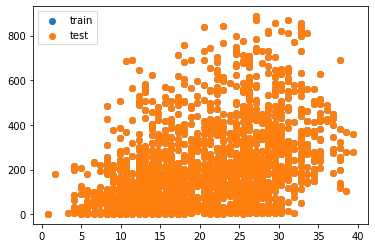

In [44]:
plt.scatter(X_test['temp'], y_test, label='train')
plt.scatter(X_test['temp'], y_pred, label='test')
plt.legend()

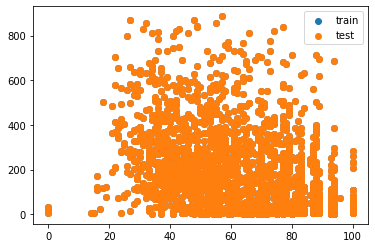

In [45]:
plt.scatter(X_test['humidity'], y_test, label='train')
plt.scatter(X_test['humidity'], y_pred, label='test')
plt.legend()

In [46]:
lr.coef_.shape

(1, 14)

In [47]:
train_data_2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour'],
      dtype='object')

In [48]:
a = list(train_data_2.columns)

In [49]:
a.remove('count')

<BarContainer object of 14 artists>

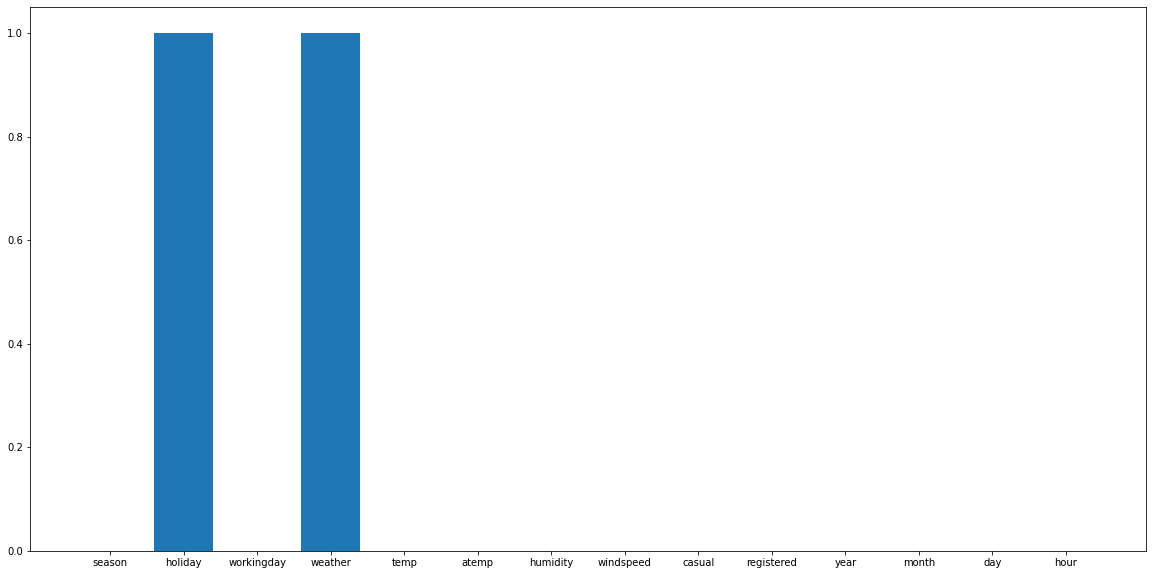

In [50]:
plt.figure(figsize=(20,10))
plt.bar(a, lr.coef_.reshape(-1))

### ( 8 ) Discussion

#### X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

#### Feature Selection의 기준이 모호한 것 같다. 위의 글 의도는 아무래도 registered가 feature로 사용될 필요가 없다라는 이야기를 하는 것 같은데 plot시 분명한 양의 상관관계를 가지고, registered의 수가 증가하면 당연히 count가 증가하는 추세를 보일 것인데 어떤 기준으로 feature selection을 하는지 모르겠다.

#### 해결 : Casual 칼럼과 registered 칼럼의 합이 count와 동일
#### 즉, 예측할 데이터가 feature의 조합으로 만들어짐. 따라서, casual과 registered 칼럼은 drop시키는게 옳다.

In [51]:
train_data = pd.read_csv('./bike_regression/data/bike-sharing-demand/train.csv')

In [52]:
(train_data['casual'] + train_data['registered'] == train_data['count']).all()

True